# 🎓 Student Performance Analysis
Using only Pandas and Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_excel("p1 stu1.xlsx")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 1. Correlation between Family Income and Exam Score

In [3]:
print(df[['Family_Income', 'Exam_Score']].dropna().corr(numeric_only=True))

            Exam_Score
Exam_Score         1.0


## 2. Average Exam Score by Gender

In [4]:
print(df.groupby("Gender")['Exam_Score'].mean())

Gender
Female    67.244898
Male      67.228894
Name: Exam_Score, dtype: float64


## 3. Average Exam Score by School Type

In [5]:
print(df.groupby("School_Type")['Exam_Score'].mean())

School_Type
Private    67.287705
Public     67.212919
Name: Exam_Score, dtype: float64


## 4. Average Exam Score by Learning Disabilities

In [6]:
print(df.groupby("Learning_Disabilities")['Exam_Score'].mean())

Learning_Disabilities
No     67.349120
Yes    66.270504
Name: Exam_Score, dtype: float64


## 5. Exam Score by Motivation Level

In [7]:
print(df.groupby("Motivation_Level")['Exam_Score'].mean())

Motivation_Level
High      67.704321
Low       66.752194
Medium    67.330648
Name: Exam_Score, dtype: float64


## 6. Average Score by Gender, School Type, and Internet Access

In [8]:
print(df.groupby(["Gender", "School_Type", "Internet_Access"])['Exam_Score'].mean())

Gender  School_Type  Internet_Access
Female  Private      No                 66.289474
                     Yes                67.400261
        Public       No                 66.668919
                     Yes                67.266371
Male    Private      No                 66.674419
                     Yes                67.326852
        Public       No                 66.465608
                     Yes                67.263928
Name: Exam_Score, dtype: float64


## 7. Participation in Extracurricular Activities

In [9]:
print(df["Extracurricular_Activities"].value_counts(normalize=True) * 100)

Extracurricular_Activities
Yes    59.603451
No     40.396549
Name: proportion, dtype: float64


## 8. Hours Studied vs Exam Score (Scatter Plot)

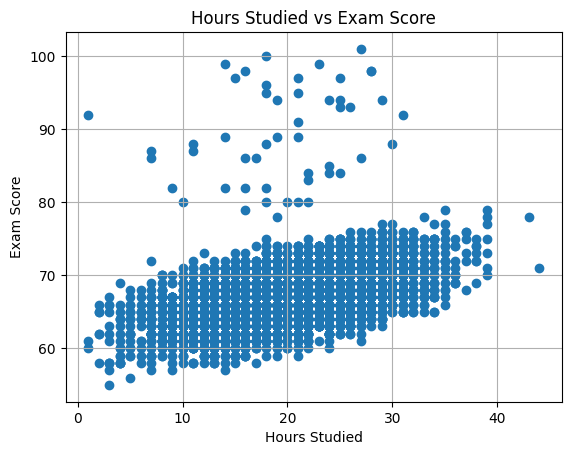

In [10]:
plt.scatter(df["Hours_Studied"], df["Exam_Score"])
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

## 9. Attendance vs Exam Score Correlation

In [11]:
print(df[["Attendance", "Exam_Score"]].corr())

            Attendance  Exam_Score
Attendance    1.000000    0.581072
Exam_Score    0.581072    1.000000


## 10. Exam Score by Parental Education and School Type

In [12]:
print(df.groupby("Parental_Education_Level")["Exam_Score"].mean())
print(df.groupby("School_Type")["Exam_Score"].mean())

Parental_Education_Level
College         67.315737
High School     66.893577
Postgraduate    67.970881
Name: Exam_Score, dtype: float64
School_Type
Private    67.287705
Public     67.212919
Name: Exam_Score, dtype: float64


## 11. Exam Score by Internet Access

In [13]:
print(df.groupby("Internet_Access")['Exam_Score'].mean())

Internet_Access
No     66.535070
Yes    67.292895
Name: Exam_Score, dtype: float64


## 📁 Save Summary to CSV

In [14]:
summary = {
    "Avg Exam Score by Gender": df.groupby("Gender")["Exam_Score"].mean(),
    "Avg Exam Score by School_Type": df.groupby("School_Type")["Exam_Score"].mean(),
    "Avg Exam Score by Motivation_Level": df.groupby("Motivation_Level")["Exam_Score"].mean()
}
summary_df = pd.DataFrame(summary)
summary_df.to_csv("performance_summary.csv")
print("Summary saved as 'performance_summary.csv'")

Summary saved as 'performance_summary.csv'
